In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
from matplotlib import pyplot as plt

In [2]:
X1 = torch.tensor([3, 4, 5, 6, 2], dtype= torch.float32)
X2 = torch.tensor([8, 5, 7, 3 ,1], dtype= torch.float32)
y = torch.tensor([-3.7, 3.5, 2.5, 11.5, 5.7], dtype= torch.float32)

In [3]:
class MLRDataset(Dataset):
    def __init__(self, X1, X2, y):
        super().__init__()
        self.X1 = X1.reshape(-1, 1)
        self.X2 = X2.reshape(-1, 1)
        self.y = y.reshape(-1, 1)
    
    def __len__(self):
        return self.X1.shape[0]
    
    def __getitem__(self, index):
        return self.X1[index], self.X2[index], self.y[index]

In [13]:
class MLR(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
    
    def forward(self, x1, x2):
        x = torch.cat((x1, x2), dim=1)
        return self.linear(x)

In [14]:
model = MLR()
dataset = MLRDataset(X1= X1, X2= X2, y= y)
dataloader = DataLoader(dataset=dataset, batch_size= dataset.__len__(), shuffle= True)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr= 0.001)

In [16]:
loss_list = []
model.train()
for epoch in range(100):
    loss = 0.0
    for input1, input2, target in dataloader:
        optimizer.zero_grad()
        output = model(input1, input2)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        print(f'parameters = weights = {model.linear.weight}, b = {model.linear.bias.item()}, loss = {loss.item()}')
        loss = loss.detach().numpy()
        loss_list.append(loss)

parameters = weights = Parameter containing:
tensor([[0.5798, 0.0875]], requires_grad=True), b = 0.24485287070274353, loss = 23.652088165283203
parameters = weights = Parameter containing:
tensor([[0.5918, 0.0753]], requires_grad=True), b = 0.24668467044830322, loss = 23.35043716430664
parameters = weights = Parameter containing:
tensor([[0.6039, 0.0632]], requires_grad=True), b = 0.24853423237800598, loss = 23.05360984802246
parameters = weights = Parameter containing:
tensor([[0.6160, 0.0514]], requires_grad=True), b = 0.25039899349212646, loss = 22.761377334594727
parameters = weights = Parameter containing:
tensor([[0.6281, 0.0398]], requires_grad=True), b = 0.2522766590118408, loss = 22.47354507446289
parameters = weights = Parameter containing:
tensor([[0.6402, 0.0284]], requires_grad=True), b = 0.25416508316993713, loss = 22.189929962158203
parameters = weights = Parameter containing:
tensor([[0.6523, 0.0172]], requires_grad=True), b = 0.256062388420105, loss = 21.9103946685791


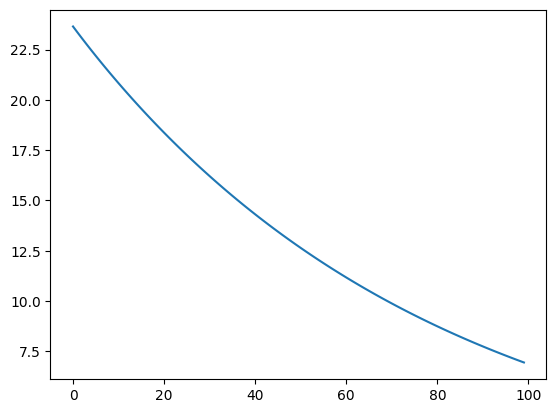

In [17]:
plt.plot(loss_list)
plt.show()

In [22]:
model.eval()
with torch.no_grad():
    test_X1 = torch.tensor([3.0]).reshape(-1, 1)
    test_X2 = torch.tensor([2.0]).reshape(-1, 1)
    predict_y = model(test_X1, test_X2)
    print(f'predcitions = {predict_y.flatten().numpy()}')

predcitions = [3.651199]
